In [1]:
from time import time

In [2]:
# from fbprophet.diagnostics
from prophet import Prophet

In [3]:
# pip install git+https://github.com/stan-dev/pystan2.git@master

In [4]:
# from prophet import Cro

In [5]:
# from prophet import ParameterGrid

In [6]:
# !pip install darts

In [7]:
# from darts import TimeSeries

In [8]:
# from darts.models import ExponentialSmoothing

In [9]:
# from darts.models import Prophet

In [3]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib
import time
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import os
import plotly.express as px

In [5]:
# from google.colab import files
# uploaded = files.upload()

In [6]:
data_1 = pd.read_csv("C:\\Users\\bahirwal\\Desktop\\Balaji\\Analyst\\Time_series\\BRICS_data.csv")

# New Section

In [7]:
#import io
#data_1 = pd.read_csv(io.BytesIO(uploaded['BRICS_data.csv']))
data_1.head()

,country_name,year,value
0,India,1960,3.702988e+10
1,India,1961,3.923244e+10
2,India,1962,4.216148e+10
3,India,1963,4.842192e+10
4,India,1964,5.648029e+10


In [8]:
data_1.shape

(287, 3)

In [9]:
is_range_index = isinstance(data_1.index, pd.RangeIndex)
print(is_range_index)

True


In [10]:
data_1['country_name'].value_counts()

country_name
India                 63
Brazil                63
China                 63
South Africa          63
Russian Federation    35
Name: count, dtype: int64

In [11]:
data_1['year'].value_counts()

year
1991    5
2007    5
1994    5
1995    5
1996    5
       ..
1984    4
1985    4
1986    4
1987    4
1960    4
Name: count, Length: 63, dtype: int64

In [12]:
time_1 = data_1.copy()

In [13]:
time_1.dtypes

country_name     object
year              int64
value           float64
dtype: object

In [14]:
time_1['year'] = pd.to_datetime(time_1['year'], format='%Y')

In [15]:
time_1.tail(20)

,country_name,year,value
267,South Africa,2003-01-01,1.970000e+11
268,South Africa,2004-01-01,2.560000e+11
269,South Africa,2005-01-01,2.890000e+11
270,South Africa,2006-01-01,3.040000e+11
271,South Africa,2007-01-01,3.330000e+11
272,South Africa,2008-01-01,3.160000e+11
273,South Africa,2009-01-01,3.300000e+11
274,South Africa,2010-01-01,4.170000e+11
275,South Africa,2011-01-01,4.580000e+11
276,South Africa,2012-01-01,4.340000e+11


In [16]:
"""# Create a DataFrame with a column containing years from 1960 to 2022
data = {'years': range(1960, 2023)}
df = pd.DataFrame(data)

# Convert the 'years' column to datetime with January 1st as the date
df['date'] = pd.to_datetime(df['years'], format='%Y')
df['date'] = df['date'].dt.replace(month=1, day=1)

# Print the resulting DataFrame
print(df)"""

"# Create a DataFrame with a column containing years from 1960 to 2022\ndata = {'years': range(1960, 2023)}\ndf = pd.DataFrame(data)\n\n# Convert the 'years' column to datetime with January 1st as the date\ndf['date'] = pd.to_datetime(df['years'], format='%Y')\ndf['date'] = df['date'].dt.replace(month=1, day=1)\n\n# Print the resulting DataFrame\nprint(df)"

In [17]:
# time_1.drop(['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5','Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],axis = 1, inplace = True)

In [18]:
# Using Boolean mask
mask = time_1['country_name']=='Russian Federation'

In [19]:
time_2 = time_1[~mask]

In [20]:
time_2.head()

,country_name,year,value
0,India,1960-01-01,3.702988e+10
1,India,1961-01-01,3.923244e+10
2,India,1962-01-01,4.216148e+10
3,India,1963-01-01,4.842192e+10
4,India,1964-01-01,5.648029e+10


In [21]:
is_range_index_1 = isinstance(time_2.index, pd.RangeIndex)
print(is_range_index_1)

False


In [22]:
time_2['country_name'].value_counts()

country_name
India           63
Brazil          63
China           63
South Africa    63
Name: count, dtype: int64

In [23]:
time_2.dtypes

country_name            object
year            datetime64[ns]
value                  float64
dtype: object

In [24]:
time_2.rename(columns = {'year' : 'date'}, inplace = True)
time_2.rename(columns = {'value' : 'y'}, inplace = True)
time_2.rename(columns = {'country_name' : 'country'}, inplace = True)

In [25]:
time_2['date'] = pd.to_datetime(time_2['date'])
time_2['y'] = time_2['y'].astype(float)

In [26]:
time_2.head()

,country,date,y
0,India,1960-01-01,3.702988e+10
1,India,1961-01-01,3.923244e+10
2,India,1962-01-01,4.216148e+10
3,India,1963-01-01,4.842192e+10
4,India,1964-01-01,5.648029e+10


In [27]:
# Creadting datframe for other purpose

In [28]:
time_data = time_2.copy()

In [29]:
first_col = time_data.pop('date')

In [30]:
time_data.insert(0, 'date', first_col)

In [31]:
time_data.set_index('date', inplace = True)

In [32]:
time_data.head()

,country,y
date,,
1960-01-01,India,3.702988e+10
1961-01-01,India,3.923244e+10
1962-01-01,India,4.216148e+10
1963-01-01,India,4.842192e+10
1964-01-01,India,5.648029e+10


In [33]:
time_data.country.nunique()

4

In [34]:
time_data.tail()

,country,y
date,,
2018-01-01,South Africa,4.040000e+11
2019-01-01,South Africa,3.890000e+11
2020-01-01,South Africa,3.380000e+11
2021-01-01,South Africa,4.190000e+11
2022-01-01,South Africa,4.060000e+11


In [35]:
time_data.dtypes

country     object
y          float64
dtype: object

In [36]:
time_data.sort_values(['country', 'date']).groupby('country').head()

,country,y
date,,
1960-01-01,Brazil,1.703047e+10
1961-01-01,Brazil,1.727594e+10
1962-01-01,Brazil,1.923175e+10
1963-01-01,Brazil,2.328771e+10
1964-01-01,Brazil,2.096373e+10
1960-01-01,China,5.971625e+10
1961-01-01,China,5.005669e+10
1962-01-01,China,4.720919e+10
1963-01-01,China,5.070662e+10


In [37]:
type(time_data)

pandas.core.frame.DataFrame

In [45]:
is_range_index_df1 = isinstance(time_data.index, pd.RangeIndex)
print(is_range_index_df1)

False


In [46]:
# dataframe for plotting data

In [38]:
# Changing dat structure to pivot table solves the problem
time_3 = time_2.pivot(index = 'date', columns = 'country', values = 'y')
time_3.head()

country,Brazil,China,India,South Africa
date,,,,
1960-01-01,1.703047e+10,5.971625e+10,3.702988e+10,8.748597e+09
1961-01-01,1.727594e+10,5.005669e+10,3.923244e+10,9.225996e+09
1962-01-01,1.923175e+10,4.720919e+10,4.216148e+10,9.813996e+09
1963-01-01,2.328771e+10,5.070662e+10,4.842192e+10,1.085420e+10
1964-01-01,2.096373e+10,5.970813e+10,5.648029e+10,1.195600e+10


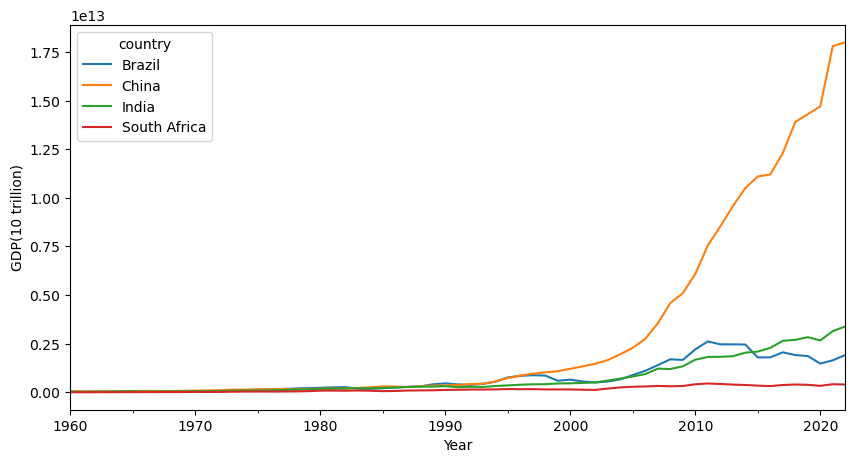

In [39]:
plt.figure(figsize = (10, 5))
time_3.plot(ax = plt.gca())
plt.xlabel('Year')
plt.ylabel('GDP(10 trillion)')
plt.legend(title = 'country')
plt.show()

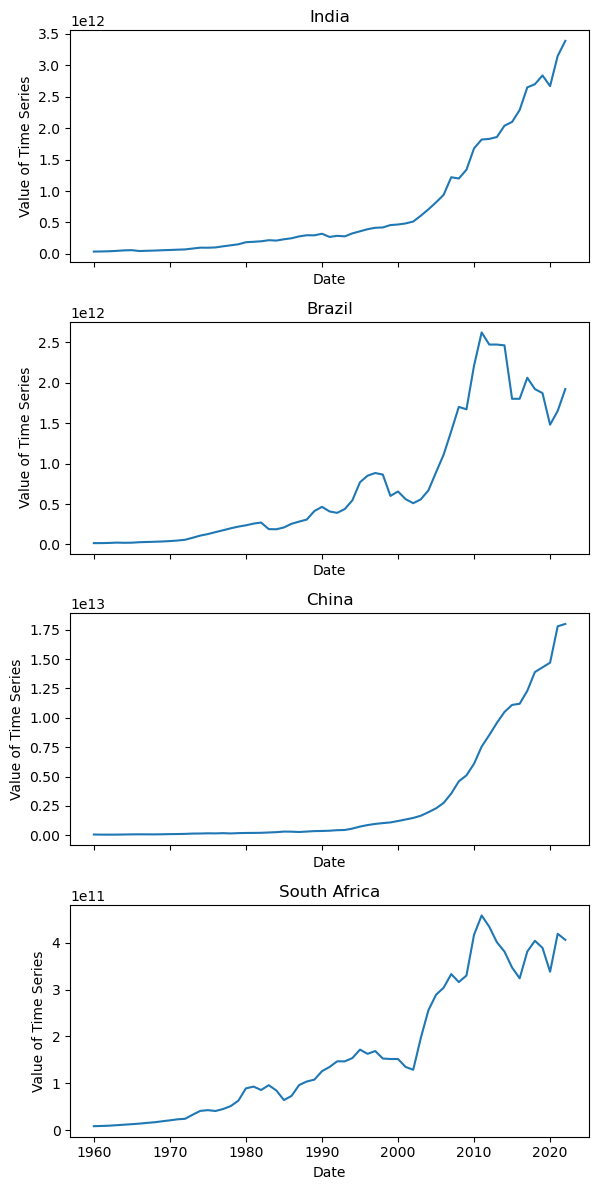

In [40]:
# below graphs show a continuous trend but seasonality is absent(OR hidden)
countries = time_2['country'].unique()

# Create a subplot for each country
fig, axs = plt.subplots(len(countries), figsize=(6, 3 * len(countries)), sharex=True)

# Plot each country's time series in a separate subplot
for i, country in enumerate(countries):
    country_data = time_2[time_2['country'] == country]
    axs[i].plot(country_data['date'], country_data['y'])
    axs[i].set_title(country)
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Value of Time Series')

plt.tight_layout()
plt.show()

In [41]:
"""# Plot timeseries for individual countries
brazil_data = time_2[time_2['country'] == 'Brazil']
plt.figure(figsize = (10, 5))
plt.plot(brazil_data['date'], brazil_data['y'])
plt.xlabel('year')
plt.ylabel('GDP(trillion)')"""

"# Plot timeseries for individual countries\nbrazil_data = time_2[time_2['country'] == 'Brazil']\nplt.figure(figsize = (10, 5))\nplt.plot(brazil_data['date'], brazil_data['y'])\nplt.xlabel('year')\nplt.ylabel('GDP(trillion)')"

In [42]:
# FbProphet model
time_4 = time_2.copy()
time_4.head()

,country,date,y
0,India,1960-01-01,3.702988e+10
1,India,1961-01-01,3.923244e+10
2,India,1962-01-01,4.216148e+10
3,India,1963-01-01,4.842192e+10
4,India,1964-01-01,5.648029e+10


In [43]:
time_4.rename(columns = {'date' : 'ds'}, inplace = True)

In [44]:
is_range_index_df2 = isinstance(time_4.index, pd.RangeIndex)
print(is_range_index_df2)

False


In [45]:
time_4.index

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       277, 278, 279, 280, 281, 282, 283, 284, 285, 286],
      dtype='int64', length=252)

In [46]:
time_4.index = pd.to_datetime(time_4.index)

In [47]:
time_4 = time_4.sort_index()

In [48]:
time_4 = time_4.reset_index()

In [49]:
time_4['ds'] = pd.to_datetime(time_4['ds'])

In [50]:
is_range_index_2 = isinstance(time_4.index, pd.RangeIndex)
print(is_range_index_2)

True


In [52]:
countries_1 = time_4.groupby('country')

In [53]:
countries_1.head()

,index,country,ds,y
0,1970-01-01 00:00:00.000000000,India,1960-01-01,3.702988e+10
1,1970-01-01 00:00:00.000000001,India,1961-01-01,3.923244e+10
2,1970-01-01 00:00:00.000000002,India,1962-01-01,4.216148e+10
3,1970-01-01 00:00:00.000000003,India,1963-01-01,4.842192e+10
4,1970-01-01 00:00:00.000000004,India,1964-01-01,5.648029e+10
63,1970-01-01 00:00:00.000000063,Brazil,1960-01-01,1.703047e+10
64,1970-01-01 00:00:00.000000064,Brazil,1961-01-01,1.727594e+10
65,1970-01-01 00:00:00.000000065,Brazil,1962-01-01,1.923175e+10
66,1970-01-01 00:00:00.000000066,Brazil,1963-01-01,2.328771e+10
67,1970-01-01 00:00:00.000000067,Brazil,1964-01-01,2.096373e+10


In [54]:
for i in countries_1.groups:
  group = countries_1.get_group(i)
  train = group[(group['ds']  >= '1960-01-01') & ((group['ds']  <= '2019-01-01'))]
  test = group[(group['ds'] > '2019-01-01')]
  print(test.shape)

(3, 4)
(3, 4)
(3, 4)
(3, 4)


In [55]:
group.head()

,index,country,ds,y
189,1970-01-01 00:00:00.000000224,South Africa,1960-01-01,8.748597e+09
190,1970-01-01 00:00:00.000000225,South Africa,1961-01-01,9.225996e+09
191,1970-01-01 00:00:00.000000226,South Africa,1962-01-01,9.813996e+09
192,1970-01-01 00:00:00.000000227,South Africa,1963-01-01,1.085420e+10
193,1970-01-01 00:00:00.000000228,South Africa,1964-01-01,1.195600e+10


In [57]:
from prophet import Prophet
from prophet.diagnostics import cross_validation
from sklearn.model_selection import ParameterGrid

In [58]:
target = pd.DataFrame()

15:50:08 - cmdstanpy - INFO - Chain [1] start processing
15:50:09 - cmdstanpy - INFO - Chain [1] done processing
15:50:09 - cmdstanpy - INFO - Chain [1] start processing
15:50:09 - cmdstanpy - INFO - Chain [1] done processing
15:50:09 - cmdstanpy - INFO - Chain [1] start processing
15:50:10 - cmdstanpy - INFO - Chain [1] done processing
15:50:10 - cmdstanpy - INFO - Chain [1] start processing
15:50:10 - cmdstanpy - INFO - Chain [1] done processing


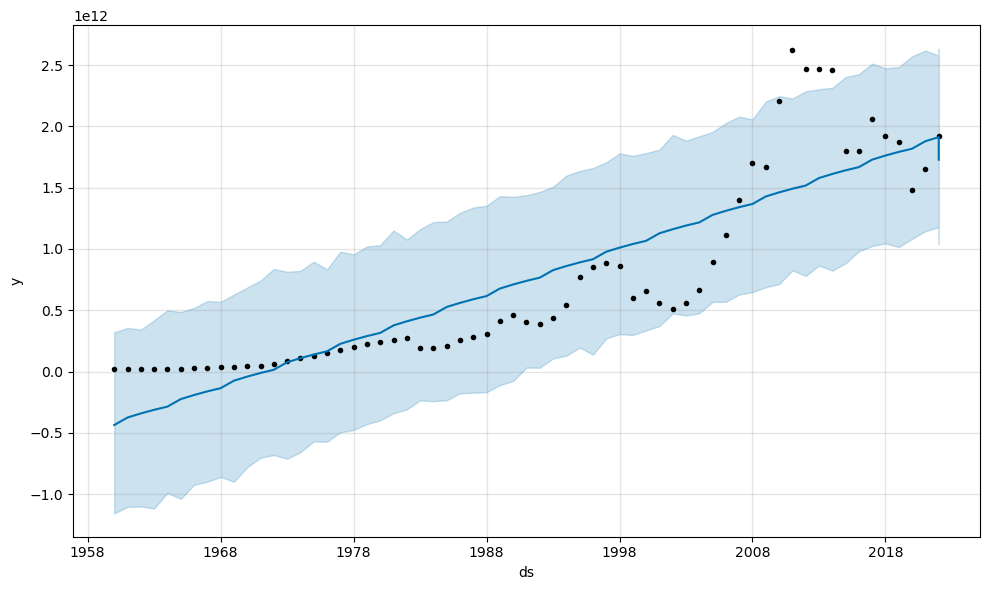

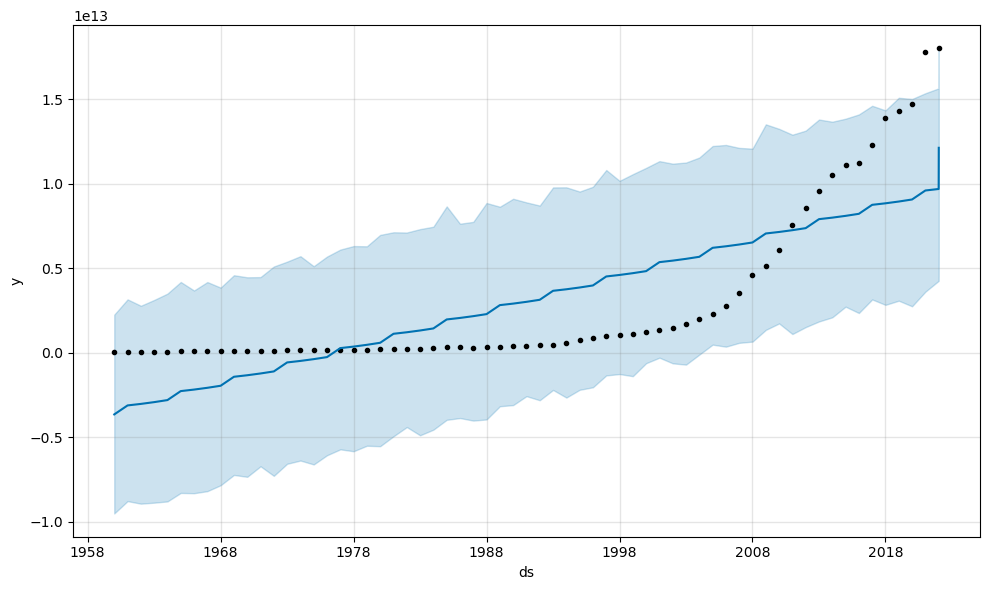

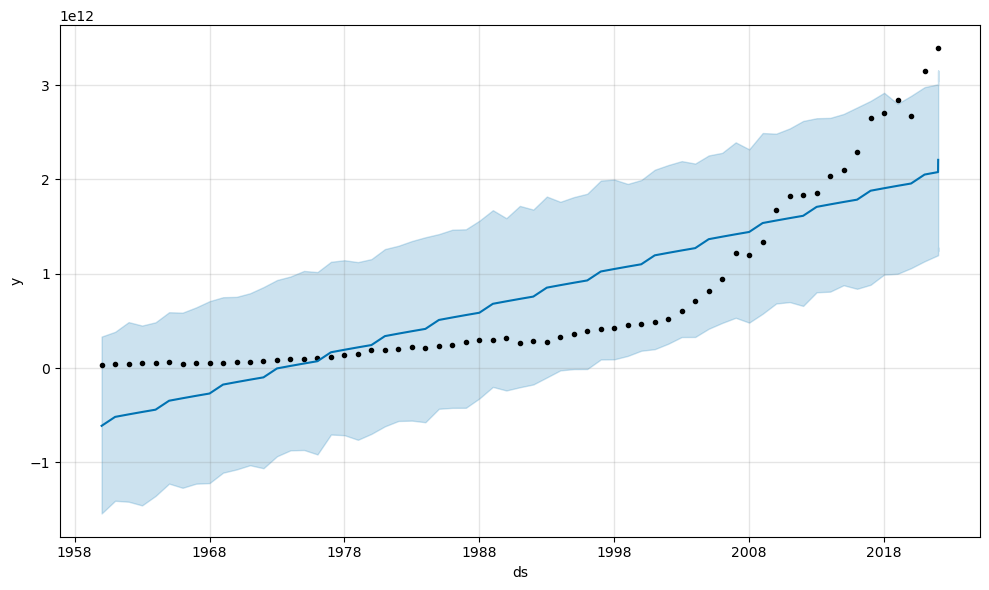

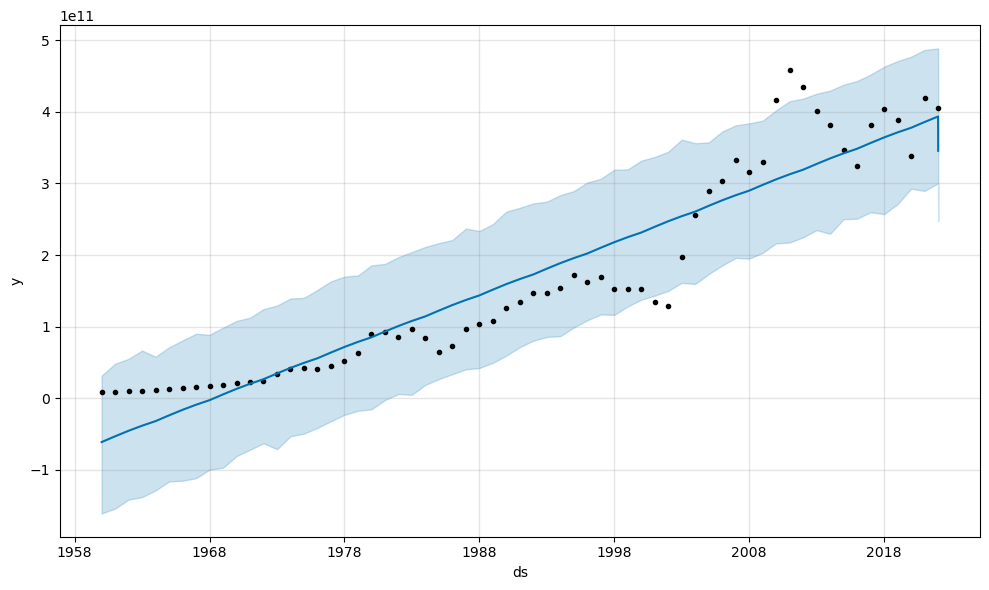

In [99]:
for i in countries_1.groups:
    group_1 = countries_1.get_group(i)
    
    m = Prophet(changepoint_prior_scale=0.01, interval_width=0.95, n_changepoints=25)
    m.fit(group_1)

    future = m.make_future_dataframe(periods=3)
    forecast = m.predict(future)

    # Plot the forecast for this group
    fig = m.plot(forecast)

    forecast_1 = forecast.rename(columns={'yhat': 'yhat_' + i})
    #target = target.merge(forecast[['ds', 'yhat_' + i]], on='ds', how='outer')
# arget = pd.merge(target, forecast.set_index('ds'), how = 'outer', left_index = True, right_index = True)

In [100]:
m.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [101]:
forecast_1.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper',
       'yhat_South Africa'],
      dtype='object')

13:19:17 - cmdstanpy - INFO - Chain [1] start processing
13:19:18 - cmdstanpy - INFO - Chain [1] done processing


MergeError: Passing 'suffixes' which cause duplicate columns {'multiplicative_terms_upper_x', 'multiplicative_terms_x', 'yearly_upper_x', 'additive_terms_upper_x', 'additive_terms_x', 'trend_x', 'yhat_upper_x', 'yearly_x', 'yearly_lower_x', 'yhat_lower_x', 'multiplicative_terms_lower_x', 'trend_lower_x', 'trend_upper_x', 'additive_terms_lower_x'} is not allowed.

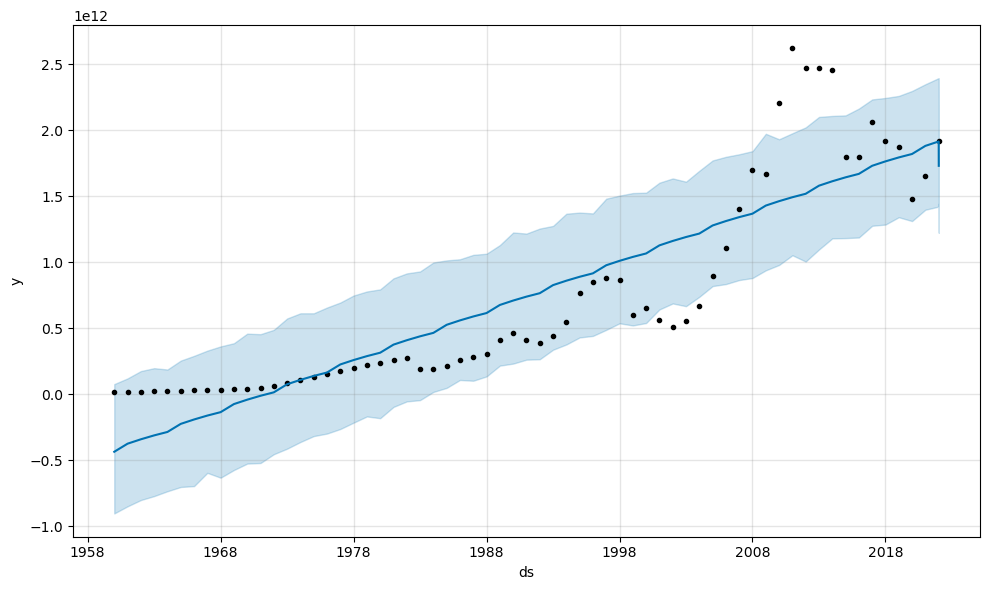

In [62]:
for i in countries_1.groups:
        group_1 = countries_1.get_group(i)
        m = Prophet()
    # interval_width = 0.95
        m.fit(group_1)
        future = m.make_future_dataframe(periods = 3)
        forecast = m.predict(future)
        m.plot(forecast)
        forecast = forecast.rename(columns = {'yhat' : 'yhat_' + i})
        target = pd.merge(target, forecast.set_index('ds'), how = 'outer', left_index = True, right_index = True)

In [102]:
target

,ds,trend_x,yhat_lower_x,yhat_upper_x,trend_lower_x,trend_upper_x,additive_terms_x,additive_terms_lower_x,additive_terms_upper_x,yearly_x,...,multiplicative_terms_upper,yhat_India_x,yhat_Brazil_y,yhat_China_y,yhat_India_y,yhat_South Africa_x,yhat_Brazil,yhat_China,yhat_India,yhat_South Africa_y
0,1960-01-01,-1.932557e+11,-1.184685e+12,2.968395e+11,-1.932557e+11,-1.932557e+11,-2.428367e+11,-2.428367e+11,-2.428367e+11,-2.428367e+11,...,0.0,-1.965793e+10,-4.360924e+11,-9.179820e+10,-1.965793e+10,-3.507863e+10,-4.360924e+11,-9.179820e+10,-1.965793e+10,-3.507863e+10
1,1961-01-01,-1.556553e+11,-1.118219e+12,3.389100e+11,-1.556553e+11,-1.556553e+11,-2.191989e+11,-2.191989e+11,-2.191989e+11,-2.191989e+11,...,0.0,1.208253e+10,-3.748542e+11,5.580406e+10,1.208253e+10,-2.914906e+10,-3.748542e+11,5.580406e+10,1.208253e+10,-2.914906e+10
2,1962-01-01,-1.181577e+11,-1.110803e+12,4.487353e+11,-1.181577e+11,-1.181577e+11,-2.234540e+11,-2.234540e+11,-2.234540e+11,-2.234540e+11,...,0.0,3.534899e+10,-3.416118e+11,4.052739e+10,3.534899e+10,-2.245776e+10,-3.416118e+11,4.052739e+10,3.534899e+10,-2.245776e+10
3,1963-01-01,-8.066014e+10,-9.780212e+11,4.910986e+11,-8.066014e+10,-8.066014e+10,-2.313368e+11,-2.313368e+11,-2.313368e+11,-2.313368e+11,...,0.0,3.510406e+10,-3.119969e+11,6.937007e+09,3.510406e+10,-1.697949e+10,-3.119969e+11,6.937007e+09,3.510406e+10,-1.697949e+10
4,1964-01-01,-4.316255e+10,-1.044154e+12,4.420064e+11,-4.316255e+10,-4.316255e+10,-2.428367e+11,-2.428367e+11,-2.428367e+11,-2.428367e+11,...,0.0,1.135310e+10,-2.859993e+11,-4.490459e+10,1.135310e+10,-1.271442e+10,-2.859993e+11,-4.490459e+10,1.135310e+10,-1.271442e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,2021-01-01,2.100786e+12,1.139287e+12,2.667486e+12,2.100786e+12,2.100786e+12,-2.191989e+11,-2.191989e+11,-2.191989e+11,-2.191989e+11,...,0.0,3.061760e+12,1.881587e+12,1.659845e+13,3.061760e+12,4.099351e+11,1.881587e+12,1.659845e+13,3.061760e+12,4.099351e+11
62,2022-01-01,2.138450e+12,1.221923e+12,2.672652e+12,2.138450e+12,2.138450e+12,-2.234540e+11,-2.234540e+11,-2.234540e+11,-2.234540e+11,...,0.0,3.214782e+12,1.914996e+12,1.749305e+13,3.214782e+12,4.200933e+11,1.914996e+12,1.749305e+13,3.214782e+12,4.200933e+11
63,2022-01-02,2.138553e+12,1.127186e+12,2.595942e+12,2.138553e+12,2.138553e+12,-2.282060e+11,-2.282060e+11,-2.282060e+11,-2.282060e+11,...,0.0,3.012576e+12,1.910347e+12,1.749351e+13,3.012576e+12,4.084572e+11,1.910347e+12,1.749351e+13,3.012576e+12,4.084572e+11
64,2022-01-03,2.138656e+12,1.200681e+12,2.593168e+12,2.138656e+12,2.138656e+12,-2.904992e+11,-2.904992e+11,-2.904992e+11,-2.904992e+11,...,0.0,2.441206e+12,1.848157e+12,1.720271e+13,2.441206e+12,3.778050e+11,1.848157e+12,1.720271e+13,2.441206e+12,3.778050e+11


In [103]:
target.columns

Index(['ds', 'trend_x', 'yhat_lower_x', 'yhat_upper_x', 'trend_lower_x',
       'trend_upper_x', 'additive_terms_x', 'additive_terms_lower_x',
       'additive_terms_upper_x', 'yearly_x', 'yearly_lower_x',
       'yearly_upper_x', 'multiplicative_terms_x',
       'multiplicative_terms_lower_x', 'multiplicative_terms_upper_x',
       'yhat_Brazil_x', 'trend_y', 'yhat_lower_y', 'yhat_upper_y',
       'trend_lower_y', 'trend_upper_y', 'additive_terms_y',
       'additive_terms_lower_y', 'additive_terms_upper_y', 'yearly_y',
       'yearly_lower_y', 'yearly_upper_y', 'multiplicative_terms_y',
       'multiplicative_terms_lower_y', 'multiplicative_terms_upper_y',
       'yhat_China_x', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower',
       'trend_upper', 'additive_terms', 'additive_terms_lower',
       'additive_terms_upper', 'yearly', 'yearly_lower', 'yearly_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat_India_x', 'yhat_B

In [104]:
target_1 = target[['yhat_Brazil', 'yhat_China', 'yhat_India', 'yhat_South Africa_y']]

In [105]:
target_1

,yhat_Brazil,yhat_China,yhat_India,yhat_South Africa_y
0,-4.360924e+11,-9.179820e+10,-1.965793e+10,-3.507863e+10
1,-3.748542e+11,5.580406e+10,1.208253e+10,-2.914906e+10
2,-3.416118e+11,4.052739e+10,3.534899e+10,-2.245776e+10
3,-3.119969e+11,6.937007e+09,3.510406e+10,-1.697949e+10
4,-2.859993e+11,-4.490459e+10,1.135310e+10,-1.271442e+10
...,...,...,...,...
61,1.881587e+12,1.659845e+13,3.061760e+12,4.099351e+11
62,1.914996e+12,1.749305e+13,3.214782e+12,4.200933e+11
63,1.910347e+12,1.749351e+13,3.012576e+12,4.084572e+11
64,1.848157e+12,1.720271e+13,2.441206e+12,3.778050e+11


In [106]:
target_1.to_csv('target_1.csv', index = True, sep = '~')

In [109]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='65 days', period='2 days', horizon = '5 days')

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/62 [00:00<?, ?it/s]

Exception: Less than two datapoints before cutoff. Increase initial window.

In [ ]:
df_cv.head()

In [ ]:
for i in countries_1.groups:
    group = countries_1.get_group(i)

    # Assuming that 'ds' is the datetime column in your DataFrame
    group['ds'] = pd.to_datetime(group['ds'])  # Convert 'ds' column to datetime if it's not already

    m = Prophet(interval_width=0.95)
    m.fit(group)
    future = m.make_future_dataframe(periods=3)
    forecast = m.predict(future)
    m.plot(forecast)
    forecast = forecast.rename(columns={'yhat': 'yhat_' + i})
    target = pd.merge(target, forecast.set_index('ds'), how='outer', left_index=True, right_index=True)


In [ ]:
# Hyper Parameter tuning

In [ ]:
import pandas as pd
from fbprophet import Prophet
from sklearn.model_selection import GridSearchCV
from fbprophet.diagnostics import cross_validation

# Load your time series data into a DataFrame
# Assuming your data has 'ds' and 'y' columns representing dates and target values

# Create a parameter grid for hyperparameter tuning
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5, 1.0],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'holidays_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Initialize the Prophet model
model = Prophet()

# Create a GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model to your data while performing hyperparameter tuning
grid_search.fit(your_data_frame)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model with the optimal hyperparameters
best_model = grid_search.best_estimator_

# Perform cross-validation to evaluate the model
df_cv = cross_validation(best_model, initial='365 days', period='180 days', horizon='365 days')


In [ ]:
## Best model with HyperParameter Tunned

In [ ]:
countries_2 = time_4.groupby('country')
countries_2.head()

In [ ]:
print(countries_2)

In [ ]:
for i in countries_2.groups:
  group_1 = countries_2.get_group(i)
  train_1 = group_1[(group_1['ds']  >= '1960-01-01') & ((group_1['ds']  <= '2019-01-01'))]
  test_1 = group_1[(group_1['ds'] > '2019-01-01')]
  print(test_1.shape)

In [ ]:
target_1 = pd.DataFrame()